In [2]:
#Final_project

In [1]:
!pip install nltk 
!pip install textblob
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [2]:
data = pd.read_excel("imdb_top_1000.xlsx")
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Reviews
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,It is a classic film that has left an indelibl...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,This must rank as the best film of all time
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"I'll say this, While i do really enjoy The Dar..."


In [3]:
data.tail(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Reviews
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,A heartfelt and touching story that celebrates...
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,An emotionally resonant narrative that explore...
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN,visually stunning masterpiece that takes you o...


In [4]:
data.shape

(1000, 17)

In [5]:
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
Reviews           object
dtype: object

Observations:
    - Except IMDB_Rating,Meta_score,Gross,No_of_Votes remaining all "OBJECT" datatypes

In [6]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,7.949300,77.971530,2.736929e+05,6.803475e+07
std,0.275491,12.376099,3.273727e+05,1.097500e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,8.100000,87.000000,3.741612e+05,8.075089e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [7]:
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Reviews
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,It is a classic film that has left an indelibl...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,This must rank as the best film of all time


In [ ]:
#Checking Null Values

In [8]:
for features in data.columns:
    if data[features].isnull().sum() > 0:
        print(f"{features} has {data[features].isnull().sum()} null values")    

Certificate has 101 null values
Meta_score has 157 null values
Gross has 169 null values
Reviews has 2 null values


Observations: Null values in columns "CERTIFICATE","META_SCORE","GROSS" can be ignored because,in data cleaning we are going to delete these columns.

In [ ]:
#Duplicate Values

In [9]:
data_dup = data[data.groupby('Series_Title')['Series_Title'].transform('count') > 1]
data_dup

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Reviews
87,https://m.media-amazon.com/images/M/MV5BYmY3Mz...,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN,"yes it's a great movie, and I think people sho..."
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478.0,Its one of the best movie I have ever seen. It...


Observations: We found two duplicate values in the dataset.we can ignore this because, release year and remaining data is different from each other

In [9]:
data[data.Reviews.isnull()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Reviews
522,https://m.media-amazon.com/images/M/MV5BOTMyZG...,Jûbê ninpûchô,1993,A,94 min,"Animation, Action, Adventure",7.9,A vagabond swordsman is aided by a beautiful n...,NaN,Yoshiaki Kawajiri,Kôichi Yamadera,Emi Shinohara,Takeshi Aono,Osamu Saka,34529,NaN,NaN
633,https://m.media-amazon.com/images/M/MV5BNWY2OD...,Tôkyô goddofâzâzu,2003,UA,90 min,"Animation, Adventure, Comedy",7.8,"On Christmas Eve, three homeless people living...",73.0,Satoshi Kon,Shôgo Furuya,Tôru Emori,Yoshiaki Umegaki,Aya Okamoto,31658,128985.0,NaN


Observations: 
    - We found two null values in Reviews, which needs to be considered and removed, because we cant movie forward in sentiment analysis without REVIEWS
    - Row numbers(522,633)
    

In [ ]:
#Data Cleaning

In Data Cleaning we are going to delete columns "POSTER_LINK","CERTIFICATE","META_SCORE","GROSS" because they wont impact this dataset in sentiment analysis

In [10]:
data.drop(['Poster_Link','Certificate','Meta_score','No_of_Votes','Gross'],axis = 1,inplace = True)

In [11]:
data.head(2)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time


In [ ]:
#Changing the column name "Series_Title" to "Movie_Name" makes much more sense

In [12]:
data.rename(columns={'Series_Title':'Movie_Name'},inplace = True)

In [13]:
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time


In [ ]:
#Now deleting the rows with null values in the "Reviews" column

In [14]:
data.drop(index=[522,633],inplace = True)

In [15]:
data.shape

(998, 12)

Observation: It was 1000,17 now it is 998,12

In [ ]:
#Data Insights

In [16]:
data.Director.value_counts().index

Index(['Alfred Hitchcock', 'Steven Spielberg', 'Hayao Miyazaki',
       'Martin Scorsese', 'Akira Kurosawa', 'Stanley Kubrick', 'Billy Wilder',
       'Woody Allen', 'Christopher Nolan', 'Quentin Tarantino',
       ...
       'Michel Hazanavicius', 'Richard Schenkman', 'Cristian Mungiu',
       'Çagan Irmak', 'Neill Blomkamp', 'Tomas Alfredson', 'Duncan Jones',
       'Jacques Audiard', 'Michel Gondry', 'George Stevens'],
      dtype='object', name='Director', length=548)

Observation : Out of 998 records we have 548 unique directors (which means that Directors with more than one record exists)

In [63]:
data.Star1.value_counts().index
data.Star2.value_counts().index
data.Star3.value_counts().index
data.Star4.value_counts().index

Index(['Michael Caine', 'Mark Ruffalo', 'Catherine Keener', 'Julianne Moore',
       'Donald Sutherland', 'Tabu', 'Christopher Plummer', 'Clive Owen',
       'Philip Seymour Hoffman', 'Paprika Steen',
       ...
       'Oka Antara', 'Allen Leech', 'Zoe Saldana', 'Dave Bautista',
       'Ben Hardy', 'Paul Rudd', 'Derek Jacobi', 'Ed Skrein', 'Merila Zare'i',
       'Godfrey Tearle'],
      dtype='object', name='Star4', length=937)

In [17]:
dir_s1=data.groupby(['Director','Star1']).size().reset_index().rename(columns={0:'count'})
dir_s1[dir_s1['count']> 1].sort_values(by='count', ascending=False)

,Director,Star1,count
11,Akira Kurosawa,Toshirô Mifune,7
405,Joel Coen,Ethan Coen,6
517,Martin Scorsese,Robert De Niro,6
136,Charles Chaplin,Charles Chaplin,6
877,Woody Allen,Woody Allen,4
...,...,...,...
433,John Woo,Yun-Fat Chow,2
450,José Padilha,Wagner Moura,2
473,Krzysztof Kieslowski,Irène Jacob,2
177,David Fincher,Brad Pitt,2


In [18]:
dir_s2=data.groupby(['Director','Star2']).size().reset_index().rename(columns={0:'count'})
dir_s2[dir_s2['count']> 1]

,Director,Star2,count
45,Alfred Hitchcock,Grace Kelly,2
81,Anthony Russo,Chris Evans,2
82,Anthony Russo,Robert Downey Jr.,2
153,Charles Chaplin,Paulette Goddard,2
208,David Lean,Alec Guinness,2
221,David Yates,Emma Watson,3
243,Edgar Wright,Nick Frost,2
319,George Roy Hill,Robert Redford,2
366,Howard Hawks,Lauren Bacall,2
375,Ingmar Bergman,Liv Ullmann,3


In [19]:
dir_s3=data.groupby(['Director','Star3']).size().reset_index().rename(columns={0:'count'})
dir_s3[dir_s3['count']> 1]

,Director,Star3,count
17,Akira Kurosawa,Tatsuya Nakadai,2
180,Clint Eastwood,Morgan Freeman,2
224,David Yates,Rupert Grint,3
226,Dean DeBlois,Gerard Butler,2
281,Francis Ford Coppola,Robert Duvall,2
445,Joe Wright,Brenda Blethyn,2
447,Joel Coen,Frances McDormand,2
448,Joel Coen,John Goodman,2
460,John Ford,Vera Miles,2
570,Martin Scorsese,Joe Pesci,4


In [20]:
dir_s4=data.groupby(['Director','Star4']).size().reset_index().rename(columns={0:'count'})
dir_s4[dir_s4['count']> 1]

,Director,Star4,count
14,Akira Kurosawa,Takashi Shimura,2
81,Anthony Russo,Mark Ruffalo,2
82,Anthony Russo,Scarlett Johansson,2
170,Christopher Nolan,Michael Caine,2
223,David Yates,Michael Gambon,2
278,Francis Ford Coppola,Diane Keaton,2
279,Francis Ford Coppola,Frederic Forrest,2
377,Ingmar Bergman,Gunnar Björnstrand,2
461,John Ford,Ward Bond,2
501,José Padilha,Milhem Cortaz,2


In [21]:
dir_stars2=data.groupby(['Director','Star1','Star2']).size().reset_index().rename(columns={0:'count'})
dir_stars2[dir_stars2['count']> 1]

,Director,Star1,Star2,count
82,Anthony Russo,Joe Russo,Chris Evans,2
83,Anthony Russo,Joe Russo,Robert Downey Jr.,2
154,Charles Chaplin,Charles Chaplin,Paulette Goddard,2
223,David Yates,Daniel Radcliffe,Emma Watson,3
245,Edgar Wright,Simon Pegg,Nick Frost,2
321,George Roy Hill,Paul Newman,Robert Redford,2
367,Howard Hawks,Humphrey Bogart,Lauren Bacall,2
387,J.J. Abrams,Chris Pine,Zachary Quinto,2
395,James Cameron,Arnold Schwarzenegger,Linda Hamilton,2
687,Peter Jackson,Elijah Wood,Ian McKellen,2


In [22]:
dir_stars3=data.groupby(['Director','Star1','Star2','Star3']).size().reset_index().rename(columns={0:'count'})
dir_stars3[dir_stars3['count']> 1]

,Director,Star1,Star2,Star3,count
226,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,3
775,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,2


In [23]:
dir_stars_comb = data.groupby(['Director','Star1','Star2','Star3','Star4']).size().reset_index().rename(columns={0:'count'})
dir_stars_comb[dir_stars_comb['count']> 1]

,Director,Star1,Star2,Star3,Star4,count
227,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,Michael Gambon,2


In [ ]:
#Data Processing

In [24]:
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time


In [25]:
data['Reviews_1'] = data['Reviews']
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,It is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,This must rank as the best film of all time


In [ ]:
#Lower Case

In [26]:
data['Reviews_1']=data['Reviews_1'].str.lower()
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,it is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,this must rank as the best film of all time


In [ ]:
#Punctuations

In [27]:
data['Reviews_1']=data['Reviews_1'].str.replace('[^\w\s]', '')
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,it is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,this must rank as the best film of all time


In [ ]:
#Removing Numbers

In [28]:
data['Reviews_1']=data['Reviews_1'].str.replace('\d', '')
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,it is a classic film that has left an indelibl...
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,this must rank as the best film of all time


In [ ]:
#Stop words

In [29]:
sw = stopwords.words('english')
sw[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [30]:
data['Reviews_1'] = data['Reviews_1'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
data.head(5)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,classic film left indelible mark cinema
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,must rank best film time
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"I'll say this, While i do really enjoy The Dar...","i'll say this, really enjoy dark knight say fa..."
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,When I watched this movie I was amazed how Rob...,watched movie amazed robert de niro nailed rol...
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,A great great movie. It is one of the highest ...,great great movie. one highest rated movie tim...


In [ ]:
#Removing Rare words

In [31]:
# Filter and convert non-string values to strings
data['Reviews_1'] = data['Reviews_1'].apply(lambda x: str(x) if not isinstance(x, str) else x)

# Calculate word counts
temp_df = pd.Series(' '.join(data['Reviews_1']).split()).value_counts()

# Identify words with a count less than or equal to 1
drops = temp_df[temp_df <= 1]

# Remove infrequent words
data['Reviews_1'] = data['Reviews_1'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [32]:
data.head(3)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,classic film left indelible mark cinema
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,must best film time
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"I'll say this, While i do really enjoy The Dar...","i'll say this, really enjoy dark say favorite ..."


In [ ]:
#Tokeinzantion

In [33]:
!pip3 install regex
import re
!pip3 install nltk
import nltk

In [34]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/pragna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
data['Reviews_1'] = data['Reviews_1'].apply(lambda x: word_tokenize(x))

In [36]:
data.head(2)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,"[classic, film, left, indelible, mark, cinema]"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,"[must, best, film, time]"


In [ ]:
#Sentiment Analysis

In [37]:
def calculate_polarity(text):
    if isinstance(text, float):
        return 0.0  
    return TextBlob(str(text)).sentiment.polarity

data["polarity_score"] = data["Reviews"].apply(calculate_polarity)

In [38]:
data.head(3)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1,polarity_score
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,"[classic, film, left, indelible, mark, cinema]",0.083333
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,"[must, best, film, time]",0.100000
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"I'll say this, While i do really enjoy The Dar...","[i, 'll, say, this, ,, really, enjoy, dark, sa...",0.312500


In [39]:
data["sentiment_label"] = data["Reviews"].apply(lambda x: "Positive" if calculate_polarity(x) > 0 else "Negative")
data.head(5)

,Movie_Name,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Reviews,Reviews_1,polarity_score,sentiment_label
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,It is a classic film that has left an indelibl...,"[classic, film, left, indelible, mark, cinema]",0.083333,Positive
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,This must rank as the best film of all time,"[must, best, film, time]",0.100000,Positive
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"I'll say this, While i do really enjoy The Dar...","[i, 'll, say, this, ,, really, enjoy, dark, sa...",0.312500,Positive
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,When I watched this movie I was amazed how Rob...,"[watched, movie, amazed, robert, de, niro, nai...",0.000000,Negative
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,A great great movie. It is one of the highest ...,"[great, great, movie, ., one, highest, rated, ...",0.675000,Positive


In [40]:
sentiment_count=data["sentiment_label"].value_counts()
sentiment_count

sentiment_label
Positive    815
Negative    183
Name: count, dtype: int64

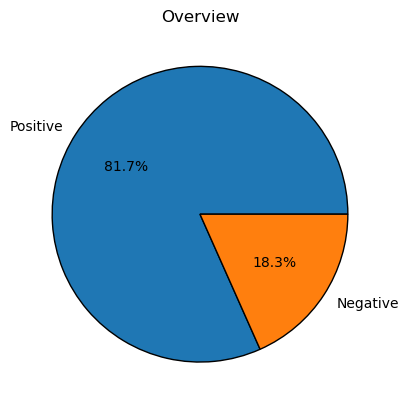

In [41]:
plt.pie(sentiment_count,labels=sentiment_count.index, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Overview")
plt.show()

In [4]:
import ipywidgets as widgets  
from IPython.display import display

def plot_moons(selected_year):
    filtered_data = data[data['Released_Year'] == selected_year]
    
    print(f"Selected Year: {selected_year}")
    color_map={'Negative': 'Red', 'Positive': 'Green'}
    
    fig = px.bar(filtered_data, x='Movie_Name', color='sentiment_label', 
                 labels={'sentiment_label': 'Sentiment'},
                 title=f"Series Title Counts for {selected_year}",
                 color_discrete_map={
                    'pos': 'green',
                    'neg': 'red'
                 },
                 hover_data=['Movie_Name', 'sentiment_label','Director','Star1','Star2'])
    
    maker_map = []
    for sentiment in filtered_data['sentiment_label']:
        maker_map.append(color_map[sentiment])
    fig.update_layout(barmode='stack')  
    fig.show()

widgets.interact(plot_moons, selected_year=widgets.Dropdown(options=data['Released_Year'].unique()))

NameError: name 'data' is not defined

In [5]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

def plot_moons(selected_year):
    filtered_data = data[data['Released_Year'] == selected_year]
    
    print(f"Selected Year: {selected_year}")
    color_map = {'Negative': 'Red', 'Positive': 'Green'}
    
    fig = px.bar(filtered_data, x='Movie_Name', y='polarity_score', color='sentiment_label', 
                 labels={'sentiment_label': 'Sentiment'},
                 title=f"Series Title Polarity Scores for {selected_year}",
                 color_discrete_map={
                     'Positive': 'green',
                     'Negative': 'red'
                 },
                 hover_data=['Movie_Name', 'sentiment_label', 'Director', 'Star1', 'Star2'])
    
    fig.update_layout(barmode='stack')  
    fig.show()

# Assuming 'data' is your DataFrame
widgets.interact(plot_moons, selected_year=widgets.Dropdown(options=data['Released_Year'].unique()))


NameError: name 'data' is not defined

In [ ]:
#Insights

In [ ]:
d_hits = data.groupby(['Director','sentiment_label']).size().reset_index().rename(columns={0:'count'})
final_d_pos = d_hits[(d_hits['count'] > 1)&(d_hits['sentiment_label']=='Positive' )].sort_values(by = 'count',ascending = False).head(10)
final_d_neg = d_hits[(d_hits['count'] > 1)&(d_hits['sentiment_label']=='Negative' )].sort_values(by = 'count',ascending = False).head(10)

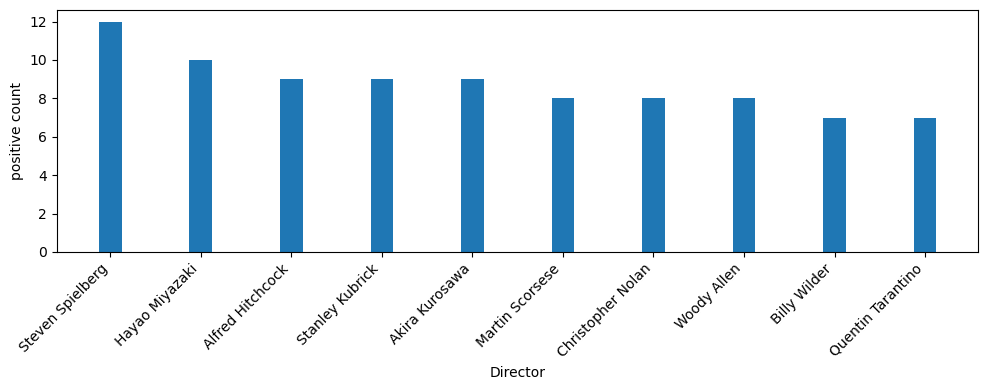

In [205]:
x=final_d_pos['Director']
y=final_d_pos['count']
plt.figure(figsize=(10, 4))
plt.bar(x,y,width=0.25)
plt.xlabel("Director")
plt.ylabel("positive count")
plt.xticks(rotation='45', ha='right') 
plt.tight_layout()
plt.show()

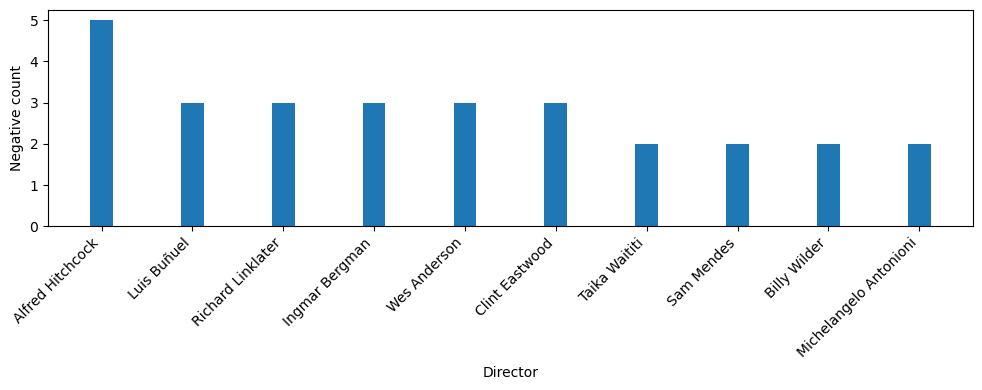

In [206]:
x=final_d_neg['Director']
y=final_d_neg['count']
plt.figure(figsize=(10, 4))
plt.bar(x,y,width=0.25)
plt.xlabel("Director")
plt.ylabel("Negative count")
plt.xticks(rotation='45', ha='right') 
plt.tight_layout()
plt.show()

In [207]:
s_hits = data.groupby(['Star1','sentiment_label']).size().reset_index().rename(columns={0:'count'})
s_hits_pos = s_hits[(s_hits['count'] > 1) &(s_hits['sentiment_label'] == 'Positive')].sort_values(by = 'count',ascending = False).head(10)
s_hits_neg = s_hits[(s_hits['count'] > 1) &(s_hits['sentiment_label'] == 'Negative')].sort_values(by = 'count',ascending = False).head(10)

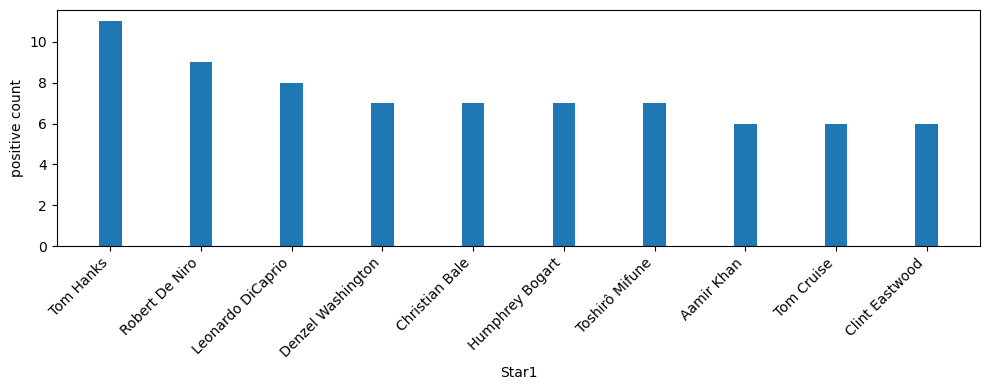

In [208]:
x=s_hits_pos['Star1']
y=s_hits_pos['count']
plt.figure(figsize=(10, 4))
plt.bar(x,y,width=0.25)
plt.xlabel("Star1")
plt.ylabel("positive count")
plt.xticks(rotation='45', ha='right') 
plt.tight_layout()
plt.show()

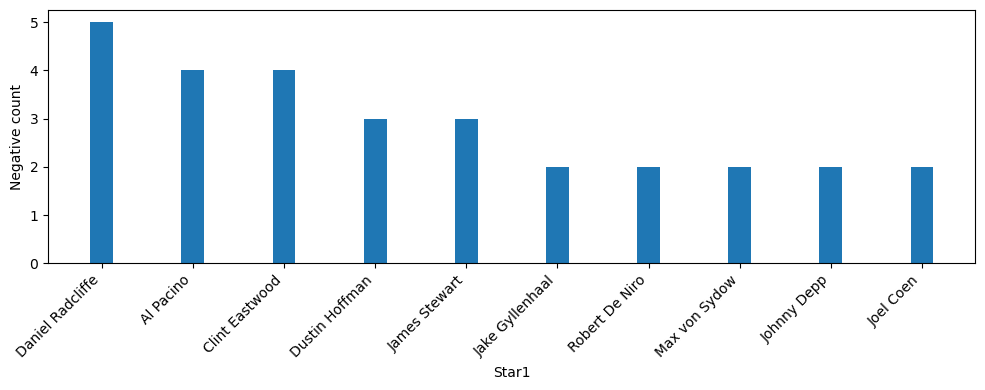

In [209]:
x=s_hits_neg['Star1']
y=s_hits_neg['count']
plt.figure(figsize=(10, 4))
plt.bar(x,y,width=0.25)
plt.xlabel("Star1")
plt.ylabel("Negative count")
plt.xticks(rotation='45', ha='right') 
plt.tight_layout()
plt.show()